<a href="https://colab.research.google.com/github/tanongsakintean/machineLearning-basic/blob/main/Chapter_1_Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Chapter 2_1**
**https://is.gd/C1foVi**
# **Data preprocessing using Scikit-Learn and Pandas**

Day 2 [23 July 2020]

'* *การเรียบเรียง เป็นการนำความรู้จากหลาย ๆ แหล่งข้อมูลที่มีอยู่แล้ว มาปรับใช้ ปรับการเขียน ให้เหมาะสมกับการให้ความรู้แก่นักศึกษาในการอบรมครั้งนี้ ขอขอบคุณ และขออนุญาต ทุกแหล่งความรู้ที่ได้นำมาใช้ ณ ที่นี้ด้วยค่ะ*

#**บทนำ**

**Data preprocessing using Scikit-Learn and Pandas**

ในหัวข้อนี้นักศึกษาจะได้เรียนรู้การเขียน Code เบื้องต้นด้วยภาษา Python

โดยอาศัย Library ชื่อ **Scikit-Learn** และ **Pandas**

เพื่อให้นักศึกษาสามารถทำการเตรียมข้อมูล เพื่อนำข้อมูลเข้าสู่กระบวนการต่อไปของ Machine Learning ได้

Data preprocessing มีส่วนช่วยให้เรานำข้อมูลมาใช้สร้างโมเดล เพื่อการทำนายที่ถูกต้องมากขึ้น

วิธีการที่มักใช้ในการทำ Data preprocessing ในที่นี้ขอกล่าวถึง 4 วิธี คือ

1. Scaling Data การปรับ scale ข้อมูลให้อยู่ในscaleที่เราต้องการ
2. Imputation การเติมข้อมูลที่ขาด
3. Handling Outliers การจัดการข้อมูลที่โดด
4. Discretization การแบ่งข้อมูลเป็นช่วง


# **scikit-learn**

scikit-learn เป็นหนึ่งในเครื่องมือในการทำ machine learning ที่มีความสามารถในการทำ predictive data analysis โดยสร้างขึ้นมาจากโมดูลหลายตัวคือ NumPy, SciPy และ matplotlib ทำให้ scikit-learn มีความสามารถที่หลากหลาย นำไปใช้ในงานได้หลายประเภท

ศึกษาเพิ่มเติมได้จากเว็บ https://scikit-learn.org/stable/index.html

# **การนำเข้า Dataset File**

ตัวอย่างในหัวข้อนี้ ใช้ข้อมูลตัวอย่างชื่อ “Wine Data Set” ซึ่งเป็นข้อมูล ขนาดเล็ก และ free download จาก นักศึกษาสามารถดูได้จากเว็บ https://archive.ics.uci.edu/ml/datasets/wine

Wine Data Set เป็นข้อมูลของเครื่องดืม Wine แต่ละชนิด ซึ่งมี Profile ที่แตกต่างกัน เช่น ค่ากรด (Malic acid), แมกนีเซียม (Magnesium), สี (Color intensity), ค่า pH ,และระดับแอกฮอลล์ ที่ไม่เท่ากัน ซึ่งสามารถ Download ได้จาก link ที่ให้ไว้ด้านบนนี้แล้ว

เพื่อสะดวกในการเรียนรู้ ขอให้นักศึกษา download file ชื่อ wine_data.csv จากเว็บ https://is.gd/PWLDX7

นำไว้บนเครื่องขอตนเองก่อน จากนั้น ให้คัดลอกไฟล์ดังกล่าวไปไว้บน google drive ของตนเอง

**ข้อควระวัง**

จำให้ได้ด้วยนะคะว่าเอาไฟล์ไปวางไว้ตรงไหนของเครื่องคอม และตรงไหนของ google drive ตัวเอง ^__^

เช่น ในตัวอย่าง google drive เก็บไฟล์ wine_data.csv ไว้ใน folder ชื่อ dataset

จากนั้น เราจะทำการ drive mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## drive mount

เพื่อเชื่อมโยง google drive ของเรากับ coloab เพื่อให้โปรแกรมที่เราเขียน มองเห็นไฟล์ใน google drive ได้ จะได้อ้างอิงและนำข้อมูลมาใช้งาน

เราใช้ from google.colab import drive ตามตัวอย่างนี้

In [2]:
from google.colab import drive
drive.mount('/content/drive') #ระวังเครื่องหมาย ‘ กับ ' ต่างกันนะคะ

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## การเรียกใช้ไฟล์ เพื่อกำหนดเป็นชุดข้อมูล

ดูตัวอย่างใน code ด้านล่าง

ในตัวอย่างเราจะเรียกใช้ไฟล์ wine_data.csv ที่เก็บไว้ใน

/content/drive/My Drive/dataset

แต่หากนักศึกษาเก็บไฟล์ไว้ต่างที่กับตัวอย่าง ก็อ้งอิงได้นะคะ โดยเปลี่ยนให้เป็นของตัวเอง

path = '.....................'

จากนั้นเราจะนำข้อมูลจากไฟล์มาเก็บไว้ในตัวแปรของ Pandas Dataframe ด้วยคำสั่ง

winedata = pd.read_csv(path)

In [3]:
#อ่านไฟล์จาก drive
import pandas as pd
#path =  'ตรงนี้ให้นักศึกษาวาง ข้อมูลที่ได้จาก การคลิกขวาที่ไฟล์นั้่น แล้วเลือก copy path เช่น'
path = '/content/drive/MyDrive/Colab Notebooks/dataset/wine_data.csv'
winedata = pd.read_csv(path) ## Dataset is now stored in a Pandas Dataframe
print ("Dataset Lenght:: ", len(winedata))
print ("Dataset Shape:: ", winedata.shape)
print(winedata)


Dataset Lenght::  177
Dataset Shape::  (177, 14)
     1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29   5.64  1.04  \
0    1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
1    1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
2    1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
3    1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
4    1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05   
..  ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
172  3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
173  3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
174  3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
175  3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
176  3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

     3.92  1065  
0    3.4

In [5]:
#อ่านไฟล์จาก local file
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
winedata = pd.read_csv(io.BytesIO(uploaded['wine_data.csv']))
print ("Dataset Lenght:: ", len(winedata))
print ("Dataset Shape:: ", winedata.shape)
print(winedata)
# Dataset is now stored in a Pandas Dataframe

Saving wine_data.csv to wine_data.csv
Dataset Lenght::  177
Dataset Shape::  (177, 14)
     1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29   5.64  1.04  \
0    1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
1    1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
2    1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
3    1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
4    1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05   
..  ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
172  3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
173  3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
174  3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
175  3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
176  3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.2

##การกำหนดชื่อ Features และ Class

เป็นขั้นตอนในการกำหนดว่า Column ใด เป็นข้อมูลของ Features ใด

และ Column ใดเป็นข้อมูลแสดง Class

ในข้อมูลตัวอย่าง กำหนดให้ข้อมูลที่อยู่ภายใต้ Column ชื่อ **Cultivator** คือ เป็นข้อมูลชนิดของ Wine ข้อมูลนี้จึงเป็น **Class**

Column อื่นๆ เป็น Features

ขอให้นักศึกษาดู code โปรแกรมตัวอย่างด้านล่าง

จากที่เราทำโหลด Data ด้วย Pandas Class

ต่อมา

เราใช้คำสั่ง winedata.head() เพื่อกำหนดชื่อของ features ให้กับข้อมูลแต่ละ column
ก่อน และแสดงตัวอย่างให้เห็นเหมือนเป็นตาราง

>ข้อมูลบางส่วน นำมาจากเว็บ https://is.gd/4p3hNw ขอขอบคุณค่ะ

In [6]:
features = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"]
winedata = pd.read_csv(path, names = features) #ถ้าอ่านจาก drive ให้ใช้ ตัวแปร path
#winedata = pd.read_csv('wine_data.csv', names = features) #้ถ้าอ่านจาก local ให้ระบุชื่อไฟล์ได้เลย
winedata.head()
X = winedata.drop('Cultivator',axis=1)
y = winedata['Cultivator'] #คือคำเฉลย
print(X)
print(y)
# แปลงค่า ที่มันห่างกันให้มันเป็นทศนิยม ค่าจะไม่ห่างกันมาก

     Alchol  Malic_Acid   Ash  Alcalinity_of_Ash  Magnesium  Total_phenols  \
0     14.23        1.71  2.43               15.6        127           2.80   
1     13.20        1.78  2.14               11.2        100           2.65   
2     13.16        2.36  2.67               18.6        101           2.80   
3     14.37        1.95  2.50               16.8        113           3.85   
4     13.24        2.59  2.87               21.0        118           2.80   
..      ...         ...   ...                ...        ...            ...   
173   13.71        5.65  2.45               20.5         95           1.68   
174   13.40        3.91  2.48               23.0        102           1.80   
175   13.27        4.28  2.26               20.0        120           1.59   
176   13.17        2.59  2.37               20.0        120           1.65   
177   14.13        4.10  2.74               24.5         96           2.05   

     Falvanoids  Nonflavanoid_phenols  Proanthocyanins  Color_i

## sklearn.preprocessing
sklearn.preprocessing เป็น package ที่เตรียม function และ classes ไว้มากมาย เพื่อจัดการกับ raw feature vectors ให้มีความเหมาะสมมากขึ้น

ตัวอย่างเช่น  นำ sklearn มาทำข้อมูลให้เป็นมาตรฐาน เราใช้

from sklearn.preprocessing import StandardScaler

เป็นต้น

# Scaling Data or Standardization

ดูข้อมูลเพิ่มเติมได้จากเว็บ https://is.gd/NXN3Le

การที่เราต้องทำ Scaling Data or Standardization ข้อมูล
ก็เพราะว่า ข้อมูลที่เราได้รับมานั้นอาจจะมีความหลากหลาย เช่น ชนิดข้อมูลต่างกัน รูปแบบข้อมูลต่างกัน และ Scale ช่วงของข้อมูลต่างกันเช่น ข้อมูลบุคคล มี 3 Feature คือ อายุ [10, 20], น้ำหนัก [30, 200] ส่วนสูง [120, 180]

โดยปกติแล้วภายใน dataset ของเราจะมีข้อมูลที่มีความสัมพันธ์กัน แต่ข้อมูลเหล่านั้นมีค่า “Variance” (ค่าความแปรปรวน) / ค่า “mean” (ค่าเฉลี่ย) ของข้อมูลซึ่งเราต้องปรับให้ความแปรปรวนข้อมูลเหล่านี้มีค่าเท่ากันและปรับให้ค่าเฉลี่ยมีค่าเท่าๆกันก่อนที่จะนำข้อมูลไปใช้


Machine Learning บางตัว ไม่สามารถรับข้อมูลหลากหลาย Scale ได้โดยตรง เราจึงต้องทำ scale data ก่อนที่เราจะป้อนข้อมูลให้กับMachine Learning เพื่อนำไปสร้าง model ต่อไป

StandardScaler เหมาะกับข้อมูลที่อยู่ในรูปแบบ Normal distribution

In [7]:
import pandas as pd
import numpy as np

##StandardScaler

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()#สร้างออบเจ็กต์ขึ้นจากคลาส StandardScaler
#print(X)
X_scaled = ss.fit_transform(X)  #ข้อมูลดิบของ wine data ผ่านการ ทำ data preprocessing แบบ StandardScaler
# fit_transform ทำการคำนวณค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานของข้อมูล X และคืนค่า X ที่ทำให้เป็นมาตรฐานแล้ว
print(X_scaled)


[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [9]:
print(X_scaled.var())

1.0


In [10]:
print(X_scaled.mean())

-1.2282501914608474e-16


ทดลองสร้าง array ขึ้นมาชื่อ X_train เพื่อนำข้อมูลนี้มาทดลองการ preprocess  

In [12]:
from sklearn import preprocessing
X_train = np.array([[ 1, -1,  2],
                    [ 2,  0,  6],
                    [ 0,  1, -1]])

In [13]:
X_train

array([[ 1, -1,  2],
       [ 2,  0,  6],
       [ 0,  1, -1]])

##Normalization with MinMaxScaler
Normalize data in range 0-1
MinMaxScaler เหมาะมากที่จะใช้อันแรกในการ Scale ก่อนเริ่ม Train model
# ใช้อะไรดี?
จริงๆ เราจะชอบพูดติดปากเวลาเราจะ Scale ข้อมูลว่า เฮ้ย data เรา normalize รึยัง แต่เอาจริงๆ แล้ว มันคือการ Scale ข้อมูลให้อยู่ในรูปแบบที่ Machine Learning อ่านค่าในการสร้าง Model ได้ง่ายขึ้น แต่วิธีไหนดีที่สุดนั้น ตอบเลยว่า ขึ้นอยู่กับข้อมูลของคุณ

โจทย์ที่เราเจอบ่อยๆ คือ การ train model ข้อมูลลูกค้า โดยจะมีข้อมูล อายุ กับ ยอดขาย ปนอยู่ ทีนี้ อายุเนี่ย ไม่เกิน 100 แน่ๆ แต่ยอดขายมีตั้งแต่ 0 ถึงล้าน วิธีการทำให้ Model ของเราทำงานได้ดีขึ้นก็คือการ Normalize data  

จากประสบการณ์ เราก็ควรเริ่มจากอะไรที่ง่ายๆ ก่อน โดยใช้ MinMaxScaler ดูก่อน แล้วค่อยลองขยับไปใช้ StandardScaler

In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
print(X_train_minmax)

[[0.5        0.         0.42857143]
 [1.         0.5        1.        ]
 [0.         1.         0.        ]]


In [15]:
print(X_train_minmax.var())

0.16717057193247667




```
# This is formatted as code
```

##แบบฝึกหัด 1

ขอให้นักศึกษานำข้อมูลจาก wind data ดูได้จากด้านบน

นำมาทำการ scaling ข้อมูลใหม่ ด้วยวิธีการ StandardScaler  1 ชุด และทำ min_max_scaler อีก 1 ชุด

In [31]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X) # เอาข้อมูลดิบ ของ X มาแปลงเป็นทศนิยม
print(X_train_minmax)

[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]


In [32]:
print(X_train_minmax.var())

0.04703962152549038


#**Imputation** (Missing Value) => การจัดการข้อมูลที่ขาดหายไป

ข้อมูลที่ขาดหายส่วนใหญ่มักจะถูกแทนที่ด้วยคำว่า N/A , NaNs, การปล่อยว่างไว้ หรือ เก็บแยกเอาไว้ต่างหาก

การสร้างโมเดลให้สามารถประมวลผลด้วยตัวเองได้โดยที่มีค่าที่ขาดหายไป (Missing Values)จำนวนมากส่งผลกระทบอย่างใหญ่หลวงในการคุณภาพการเรียนรู้ของเครื่องจักร (Machine Learning)

6 เทคนิคที่มักใช้งานกันเมื่อต้องเผชิญหน้ากับข้อมูลที่ไม่ครบถ้วนใน Dataset

1. Do Nothing (ไม่ทำอะไรกับมันเลย ปล่อยไว้แบบนั้น) ไม่ควร!

2. Imputation Using (Mean/Median) Values (เติมเต็มข้อมูลที่สูญหายด้วย การใช้ค่าเฉลี่ย / ค่ากลาง)

3. Imputation Using (Most Frequent) or (Zero/Constant) Values (เติมเต็มข้อมูลด้วยค่าที่มีจำนวนนับมากที่สุด หรือ การใช้ค่า 0 เข้ามาช่วย)

4. Imputation Using k-NN (เติมเต็มข้อมูลด้วยค่าที่อยู่ละแวกเดียวกัน หรือ คล้ายคลึงกัน)

5. Imputation Using Multivariate Imputation by Chained Equation (MICE) (เติมเต็มข้อมูลที่สูญหายด้วยหลักการ MICE)

6. Imputation Using Deep Learning (Datawig) (เติมเต็มข้อมูลที่สูญหายด้วย การใช้ Deep Learning ให้ข้อมูลจำนวนมากหาค่าที่เหมาะสมมาลงแทน)

**ไม่มีวิธีที่สมบูรณ์แบบที่สุดในการเติมเต็มค่าข้อมูลที่ขาดหายไป แต่ละกลยุทธ์ทำงานได้ดีแตกต่างกันขึ้นอยู่กับ Dataset และ ประเภทของค่าที่ขาดหายไป สิ่งที่เราต้องทำก็คือ ทดลอง

อ่านข้อมูลเพิ่มได้ท่ี https://scikit-learn.org/stable/modules/impute.html#univariate-vs-multivariate-imputation

In [33]:
df = pd.DataFrame({
    'Part': ['Monitor', 'CPU', None, 'Mouse', None, 'Extensions', 'Table', 'Chair', 'Wifi'],
    'Feature': ['LED', 'i7', 'RGB', 'Wireless', 'Zebronics', None, 'Urban Clap', 'Apex Chairs', 'Airtel'],
    'Price': [12000, 3500, None, 1200, None, 250, 7000, 12000, 799]
})
print(df)

         Part      Feature    Price
0     Monitor          LED  12000.0
1         CPU           i7   3500.0
2        None          RGB      NaN
3       Mouse     Wireless   1200.0
4        None    Zebronics      NaN
5  Extensions         None    250.0
6       Table   Urban Clap   7000.0
7       Chair  Apex Chairs  12000.0
8        Wifi       Airtel    799.0


**isnull()**
returns True for all the missing values & False for all the occupied values.

In [34]:
df.isnull()

,Part,Feature,Price
0,False,False,False
1,False,False,False
2,True,False,True
3,False,False,False
4,True,False,True
5,False,True,False
6,False,False,False
7,False,False,False
8,False,False,False


**dropna()**
dropna removes the entire row having missing value เอาไว้ลบ row ที่มี missing \n
ปล. ไม่ได้ลบจริง เพราะ ไม่ได้ df = df.dropna()

In [35]:
df.dropna()

,Part,Feature,Price
0,Monitor,LED,12000.0
1,CPU,i7,3500.0
3,Mouse,Wireless,1200.0
6,Table,Urban Clap,7000.0
7,Chair,Apex Chairs,12000.0
8,Wifi,Airtel,799.0


In [36]:
df
#ตัวเลขขึ้น NaN
# ประเภทขึ้น None

,Part,Feature,Price
0,Monitor,LED,12000.0
1,CPU,i7,3500.0
2,None,RGB,NaN
3,Mouse,Wireless,1200.0
4,None,Zebronics,NaN
5,Extensions,None,250.0
6,Table,Urban Clap,7000.0
7,Chair,Apex Chairs,12000.0
8,Wifi,Airtel,799.0



# replace with mean using Imputer


In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean') #จัดการข้อมูลที่มีค่าเป็น nan ด้วยใช้ค่า mean แทน
# ถ้ามีข้อมูลมีเพียง 1 มิติ (Feature ที่ต้องการเปลี่ยนมี Column เดียว) ต้องมีการ .reshape() ให้อยู่ในรูป 1 มิติก่อนเริ่มทำงาน โดยให้ค่าเป็น (-1, 1)
df.Price= imputer.fit_transform(df['Price'].values.reshape(-1,1))[:,0] #ทุกrow ใน column 0  ของ df['Price]
df


,Part,Feature,Price
0,Monitor,LED,12000.000000
1,CPU,i7,3500.000000
2,None,RGB,5249.857143
3,Mouse,Wireless,1200.000000
4,None,Zebronics,5249.857143
5,Extensions,None,250.000000
6,Table,Urban Clap,7000.000000
7,Chair,Apex Chairs,12000.000000
8,Wifi,Airtel,799.000000


##most_frequent

In [40]:
print(df)
print()
from sklearn.impute import SimpleImputer
#จัดการข้อมูลที่มีค่าเป็น None ด้วยใช้ค่า most_frequent แทน
imputer = SimpleImputer(missing_values=None, strategy='most_frequent') #สังเกตตรง missing value
df.Feature= imputer.fit_transform(df['Feature'].values.reshape(-1,1))[:,0]
df.Part= imputer.fit_transform(df['Part'].values.reshape(-1,1))[:,0]
df

         Part      Feature         Price
0     Monitor          LED  12000.000000
1         CPU           i7   3500.000000
2         CPU          RGB   5249.857143
3       Mouse     Wireless   1200.000000
4         CPU    Zebronics   5249.857143
5  Extensions       Airtel    250.000000
6       Table   Urban Clap   7000.000000
7       Chair  Apex Chairs  12000.000000
8        Wifi       Airtel    799.000000



,Part,Feature,Price
0,Monitor,LED,12000.000000
1,CPU,i7,3500.000000
2,CPU,RGB,5249.857143
3,Mouse,Wireless,1200.000000
4,CPU,Zebronics,5249.857143
5,Extensions,Airtel,250.000000
6,Table,Urban Clap,7000.000000
7,Chair,Apex Chairs,12000.000000
8,Wifi,Airtel,799.000000


##แบบฝึกหัด 2
จากข้อมูลที่กำหนดให้ข้างล่าง นักศึกษาตั้งชื่อฟิล์ด ดังนี้

'marks', 'gender', 'result'  เรียงตามลำดับ

หลังจากนั้นทำการค้นหาว่าข้อมูลนี้มีข้อมูลที่สูญหายหรือไม่  ถ้ามีให้จัดการแทนที่ข้อมูลที่สูญหายด้วยค่า mean และค่า most frequent


In [45]:
#เขียนโปรแกรมของนักศึกษาไว้ที่นี่
students = [[85, 'M', 'verygood'],
           [95, 'F', 'excellent'],
           [75, None,'good'],
           [np.NaN, 'M', 'average'],
           [70, 'M', 'good'],
           [np.NaN, None, 'verygood'],
           [92, 'F', 'verygood'],
           [98, 'M', 'excellent']]

df = pd.DataFrame(students, columns=["marks", "gender", "result"])  #add column to DataFrame
print (df)

   marks gender     result
0   85.0      M   verygood
1   95.0      F  excellent
2   75.0   None       good
3    NaN      M    average
4   70.0      M       good
5    NaN   None   verygood
6   92.0      F   verygood
7   98.0      M  excellent


In [46]:
df.isnull()

,marks,gender,result
0,False,False,False
1,False,False,False
2,False,True,False
3,True,False,False
4,False,False,False
5,True,True,False
6,False,False,False
7,False,False,False


In [52]:
print(df)
print()
from sklearn.impute import SimpleImputer
#จัดการข้อมูลที่มีค่าเป็น None ด้วยใช้ค่า most_frequent แทน
imputer = SimpleImputer(missing_values=None, strategy='most_frequent') #สังเกตตรง missing value
df.gender= imputer.fit_transform(df['gender'].values.reshape(-1,1))[:,0]
df.gender= imputer.fit_transform(df['gender'].values.reshape(-1,1))[:,0]
df

       marks gender     result
0  85.000000      M   verygood
1  95.000000      F  excellent
2  75.000000   None       good
3  85.833333      M    average
4  70.000000      M       good
5  85.833333   None   verygood
6  92.000000      F   verygood
7  98.000000      M  excellent



,marks,gender,result
0,85.000000,M,verygood
1,95.000000,F,excellent
2,75.000000,M,good
3,85.833333,M,average
4,70.000000,M,good
5,85.833333,M,verygood
6,92.000000,F,verygood
7,98.000000,M,excellent


In [53]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean') #จัดการข้อมูลที่มีค่าเป็น nan ด้วยใช้ค่า mean แทน
# ถ้ามีข้อมูลมีเพียง 1 มิติ (Feature ที่ต้องการเปลี่ยนมี Column เดียว) ต้องมีการ .reshape() ให้อยู่ในรูป 1 มิติก่อนเริ่มทำงาน โดยให้ค่าเป็น (-1, 1)
df.marks= imputer.fit_transform(df['marks'].values.reshape(-1,1))[:,0] #ทุกrow ใน column 0  ของ df['marks]
df


,marks,gender,result
0,85.000000,M,verygood
1,95.000000,F,excellent
2,75.000000,M,good
3,85.833333,M,average
4,70.000000,M,good
5,85.833333,M,verygood
6,92.000000,F,verygood
7,98.000000,M,excellent


In [54]:
df

,marks,gender,result
0,85.000000,M,verygood
1,95.000000,F,excellent
2,75.000000,M,good
3,85.833333,M,average
4,70.000000,M,good
5,85.833333,M,verygood
6,92.000000,F,verygood
7,98.000000,M,excellent


#Handling Outliers

Outlier (หรือเรียกว่า anomaly, extreme value) คือ data points ที่มีค่าสูงหรือต่ำกว่า data points ส่วนใหญ่ในชุดข้อมูล อย่างมาก

เช่น ส่วนสูง 210 cm คือค่า outlier สำหรับคนไทย

วิธีการตรวจสอบ Outlier อาจดูได้จาก boxplot หรือ คำนวณค่าสถิติ

ในที่นี้ยกตัวอย่าง การดู Outlier จาก boxplot

(ตัวอย่าง อ้างอิงมาจากเว็บ https://is.gd/DvH2FR)

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Put dataset
df = pd.read_csv('https://raw.githubusercontent.com/mGalarnyk/Python_Tutorials/master/Kaggle/BreastCancerWisconsin/data/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


##boxplot

In [56]:
df['area_mean']

0      1001.0
1      1326.0
2      1203.0
3       386.1
4      1297.0
        ...  
564    1479.0
565    1261.0
566     858.1
567    1265.0
568     181.0
Name: area_mean, Length: 569, dtype: float64

<Axes: xlabel='area_mean'>

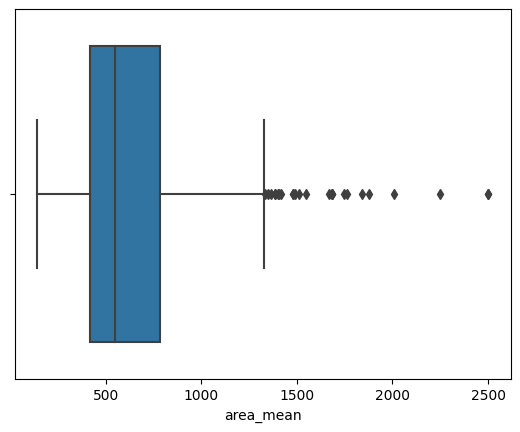

In [57]:
sns.boxplot(x=df['area_mean'])

● Q1 ค่า 1st Quartile หรือบางครั้งเรียกว่า Percentile ที่ 25 ให้ลองจินตนาการ ว่านำข้อมูล 100 ข้อมูล มาเรียงกันจากน้อยไปมาก ค่านี้เป็นลำดับที่ 25 ค่านี้เป็นค่าที่ แบ่งข้อมูล ¼ ส่วนแรกออกมาให้เห็น


In [58]:
df['area_mean'].quantile(0.25)

420.3

Q3 ค่า 3rd Quartile หรือบางครั้งเรียกว่า
Percentile ที่ 75 ให้ลองจินตนาการ ว่านำข้อมูล 100 ข้อมูล มาเรียงกันจากน้อยไปมาก ค่านี้เป็นลำดับที่ 75 ข้อมูลที่มีค่า ต่ำกว่าค่านี้จะมีจำนวน ¾ หรือ 75 เปอร์เซ็นต์ ส่วนอีก 25 เปอร์เซ็นต์ จะมีค่ามากกว่าค่านี้

In [59]:
df['area_mean'].quantile(0.75)

782.7

Q1-Q3 ช่วงระหว่าง Q1-Q3 เรียกว่า Inter Quartile (บางทีอาจเขียนว่า Q3- Q1 ก็ได้) จะเห็นความกว้างของ Box (รูปสี่เหลี่ยม) เป็นช่วงที่ทำให้เราเห็นได้ว่าข้อมูล ช่วงกลาง 50 เปอร์เซ็นต์ของข้อมูลทั้งหมด จะอยู่ระหว่างช่วงนี้ ในกรณีที่เราเปรียบเทียบ ข้อมูลหลายชุด เราอาจใช้ช่วง Q1-Q3 นี้เป็นดัชนีชี้วัดความผันแปรของกระบวนการหรือ ผลิตภัณฑ์ได้กล่าวคือ หาก Q1-Q3 มีช่วงที่กว้าง แสดงให้เห็นว่ามีความผันแปรที่สูง



In [60]:
Q1 = df['area_mean'].quantile(0.25)
Q3 = df['area_mean'].quantile(0.75)
IQR = Q3-Q1
IQR  #

362.40000000000003

In [61]:
lower_lim = Q1-1.5*IQR
lower_lim


-123.30000000000001

In [62]:
upper_lim = Q3+1.5*IQR
upper_lim

1326.3000000000002

In [63]:
df['area_mean']

0      1001.0
1      1326.0
2      1203.0
3       386.1
4      1297.0
        ...  
564    1479.0
565    1261.0
566     858.1
567    1265.0
568     181.0
Name: area_mean, Length: 569, dtype: float64

**winsorize** เอาไว้จัดการ outlier ของ boxplot

In [64]:
from scipy.stats.mstats import winsorize

We will create a new variable with Winsorize Method. To implement the Winsorize Method, we write the exact boundary points as a tuple on the percentile. For example, we will write (0.1, 0.1). This means we want to apply quantile(0.1) and quantile(0.90) as a boundary. The first one is the exact point on percentile from the beginning, the second one is exact point on percentile from the end.
https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8

In [65]:
df_area_mean_win = winsorize(df['area_mean'],(0.1, 0.1)) #=> (0.1 => อีก 0.1 outlier ของต่ำสุด, 0.1 อีก0.1 outlier ของสูงสุด)
df_area_mean_win

masked_array(data=[1001. , 1191. , 1191. ,  386.1, 1191. ,  477.1, 1040. ,
                    577.9,  519.8,  475.9,  797.8,  781. , 1123. ,  782.7,
                    578.3,  658.8,  684.5,  798.8, 1191. ,  566.3,  520. ,
                    321.6,  704.4, 1191. ,  904.6,  912.7,  644.8, 1094. ,
                    732.4,  955.1, 1088. ,  440.6,  899.3, 1162. ,  807.2,
                    869.5,  633. ,  523.8,  698.8,  559.2,  563. ,  371.1,
                   1104. ,  545.2,  531.5, 1076. ,  321.6,  534.6,  449.3,
                    561. ,  427.9,  571.8,  437.6, 1033. ,  712.8,  409. ,
                   1152. ,  656.9,  527.2,  321.6,  321.6,  321.6,  645.7,
                    321.6,  499. ,  668.3,  321.6,  394.1,  321.6,  502.5,
                   1130. ,  321.6,  929.4,  584.1,  470.9,  817.7,  559.2,
                   1006. , 1191. ,  506.3,  401.5,  520. , 1191. , 1132. ,
                    443.3, 1075. ,  648.2, 1076. ,  466.1,  651.9,  662.7,
                    728.2

In [66]:
df_area_mean_win.count()

569

<Axes: >

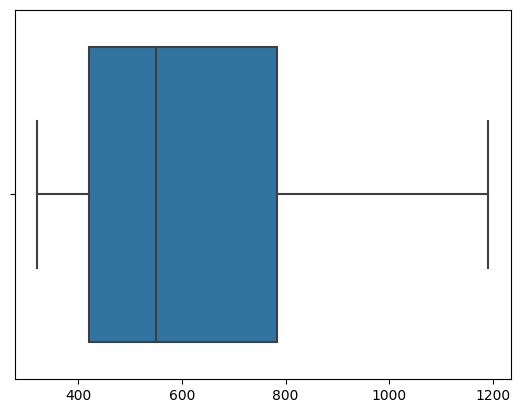

In [67]:
sns.boxplot(x=df_area_mean_win)

# Discretization

การแบ่งข้อมูลเป็นช่วง

ตัวอย่างจาก
https://androidkt.com/discretization-binning-and-count-in-column-with-pandas/


Discretization, Binning, and Count in Column with Pandas.

In [68]:
customer = [[5, 'M', 'verygood'],
           [20, 'F', 'excellent'],
           [30, 'F','good'],
           [16, 'M', 'average'],
           [70, 'M', 'good'],
           [25, 'M', 'verygood'],
           [55, 'F', 'verygood'],
           [36, 'M', 'excellent']]

df = pd.DataFrame(customer)
df.columns = ['age','sex','type']
df


,age,sex,type
0,5,M,verygood
1,20,F,excellent
2,30,F,good
3,16,M,average
4,70,M,good
5,25,M,verygood
6,55,F,verygood
7,36,M,excellent


# Equal_width

In [71]:
df['binned']=pd.cut(x=df['age'], bins=[0,14,24,64,100]) #แบ่งช่วง
df

,age,sex,type,binned,category
0,5,M,verygood,"(0, 14]",Child
1,20,F,excellent,"(14, 24]",Young
2,30,F,good,"(24, 64]",Adults
3,16,M,average,"(14, 24]",Young
4,70,M,good,"(64, 100]",Senior
5,25,M,verygood,"(24, 64]",Adults
6,55,F,verygood,"(24, 64]",Adults
7,36,M,excellent,"(24, 64]",Adults


In [72]:
category = ['Child', 'Young', 'Adults', 'Senior']

df['category']=pd.cut(x=df['age'], bins=[0,14,24,64,100],labels=category) #เอาประเภทแทนช่วงให้อ่านง่าย
df

,age,sex,type,binned,category
0,5,M,verygood,"(0, 14]",Child
1,20,F,excellent,"(14, 24]",Young
2,30,F,good,"(24, 64]",Adults
3,16,M,average,"(14, 24]",Young
4,70,M,good,"(64, 100]",Senior
5,25,M,verygood,"(24, 64]",Adults
6,55,F,verygood,"(24, 64]",Adults
7,36,M,excellent,"(24, 64]",Adults


# Equal_Frequency

In [73]:
df['bin_freq']=pd.cut(df['age'], 3) #number of bins
df


,age,sex,type,binned,category,bin_freq
0,5,M,verygood,"(0, 14]",Child,"(4.935, 26.667]"
1,20,F,excellent,"(14, 24]",Young,"(4.935, 26.667]"
2,30,F,good,"(24, 64]",Adults,"(26.667, 48.333]"
3,16,M,average,"(14, 24]",Young,"(4.935, 26.667]"
4,70,M,good,"(64, 100]",Senior,"(48.333, 70.0]"
5,25,M,verygood,"(24, 64]",Adults,"(4.935, 26.667]"
6,55,F,verygood,"(24, 64]",Adults,"(48.333, 70.0]"
7,36,M,excellent,"(24, 64]",Adults,"(26.667, 48.333]"


Note that pd.value_counts(bins) are the bin counts for the result of pandas.cut .

In [74]:
pd.value_counts(df['bin_freq'])

(4.935, 26.667]     4
(26.667, 48.333]    2
(48.333, 70.0]      2
Name: bin_freq, dtype: int64

##แบบฝึกหัด 3

นักศึกษานำข้อมูลมาจากชุดข้อมูล ข้างล่าง โดยมีคำสั่งดังนี้
1. แบ่งช่วงข้อมูลของ age ด้วยวิธีการ equal_freqency ทั้งหมด 5 ช่วง และใส่ประเภทของช่วงเรียงตามลำดับดังนี้

'Generation Z','Millennials', 'Generation X', 'Baby Boomers', 'The Silent Generation'


2. แบ่งประเภทของข้อมูล bad_loans ด้วยวิธีการ equal_width ทั้งหมด 3 ช่วง โดยให้กำหนดช่วงดังนี้ <= 30, 31-50, >50


In [92]:
d = {'age': [18,67,78,67,78,24,25,45, 30,45,34,43, 20,27,28,31, 40, 55],
'bad_loans': [18,67,78,67,78,24,25,45, 30,45,34,43, 20,27,28,31, 40, 55]}

df = pd.DataFrame(d)
#.......เขียน code ตรงนี้จ้า
#equal_freqency
category = ['Generation Z','Millennials', 'Generation X', 'Baby Boomers', 'The Silent Generation']
df['bin_freq']=pd.cut(df['age'], 5,labels=category) #number of bins
df

,age,bad_loans,bin_freq
0,18,18,Generation Z
1,67,67,The Silent Generation
2,78,78,The Silent Generation
3,67,67,The Silent Generation
4,78,78,The Silent Generation
5,24,24,Generation Z
6,25,25,Generation Z
7,45,45,Generation X
8,30,30,Generation Z
9,45,45,Generation X


In [93]:
#equal_width
df['bin_width']=pd.cut(x=df['bad_loans'], bins=[-float('inf'),30,31,50,float('inf')]) #แบ่งช่วง
df


,age,bad_loans,bin_freq,bin_width
0,18,18,Generation Z,"(-inf, 30.0]"
1,67,67,The Silent Generation,"(50.0, inf]"
2,78,78,The Silent Generation,"(50.0, inf]"
3,67,67,The Silent Generation,"(50.0, inf]"
4,78,78,The Silent Generation,"(50.0, inf]"
5,24,24,Generation Z,"(-inf, 30.0]"
6,25,25,Generation Z,"(-inf, 30.0]"
7,45,45,Generation X,"(31.0, 50.0]"
8,30,30,Generation Z,"(-inf, 30.0]"
9,45,45,Generation X,"(31.0, 50.0]"
